#Extrapolating Fracture Permeability and Closure Pressure to Reservoir Pressure for Different Fracturing Fluids using Polynomial Regression Analysis

The experiment aims to explore the relationship between closure pressure and permeability of fractures . The focus is to analyze the impact of different types of fracturing fluids such as Guar, Viscoelastic surfactant fluid, and Viscoelastic surfactant + Nano particle on fracture permeability. The study employs experimental methods to measure closure pressure and permeability under various fluid closure pressure. Using the results, a basic polynomial regression is performed to extrapolate permeability values for pressure values that cannot be measured in the laboratory. The goal of this project is to gain a deeper understanding of the interaction between fluid types, closure pressure, and fracture permeability, which can inform future  hydraulic fracturing development decisions.

The polynomial regression used in this experiment was based on the formulas described in the reference `"Wen, Q. et al (2007).`.
This reference provides the basis for modeling the relationship between closure pressure and fracture permeability using a cubic polynomial.






A device is designed to simulate the flow of hydrocarbons through a fracture during flow-back by using 

 1) high-pressure-resistant metal cells (pressures similar to hydrocarbon reservoir pressures) and 
 
 2) a pressure apparatus to increase pressure within the experimental cells through a hydraulic system.


###Description and General Scheme of the Device:
#### The Pressure Apparatus

It consists of two parallel and horizontal metal plates, the lower plate is a fixed plate that serves as a support for the cells, while the upper plate is a movable plate that is used to apply pressure on the pistons of the two cells to increase pressure within the cylinder. The pressure is generated by the hydraulic jack placed above the upper plate.
The movable plate is connected to the roof of the apparatus by two springs so that it can return to its original position in case of elimination of the applied pressure.

#### The Cell for Measuring the Permeability of the Compacted Proppant

The cell consists of an empty cylinder, a pressure piston, and a curved and drilled and threaded part, the piston rod is also a hollow threaded cylinder that passes through the hole of the curved part where it can be tightened with a nut to maintain the pressure. 







A descriptive drawing for  the Cell filled with proppant and the compression apparatus


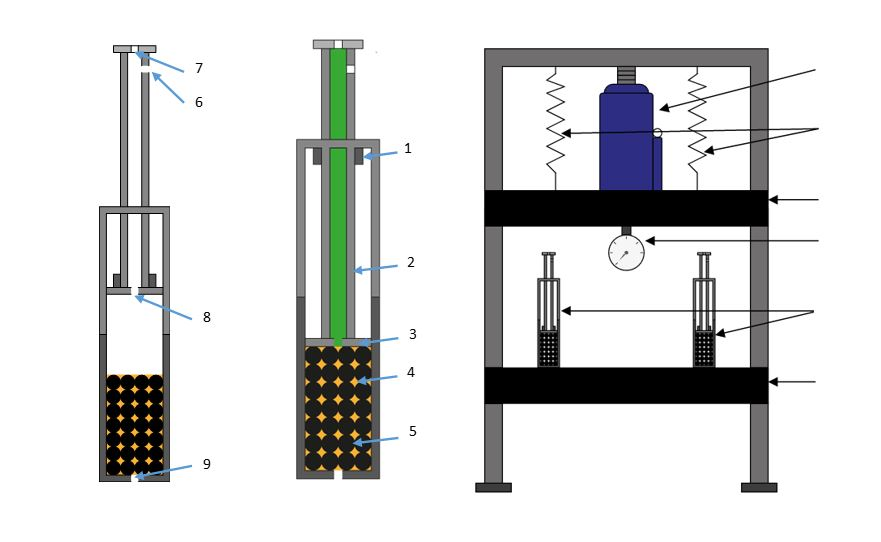

The diagram below explains the steps of the experiment



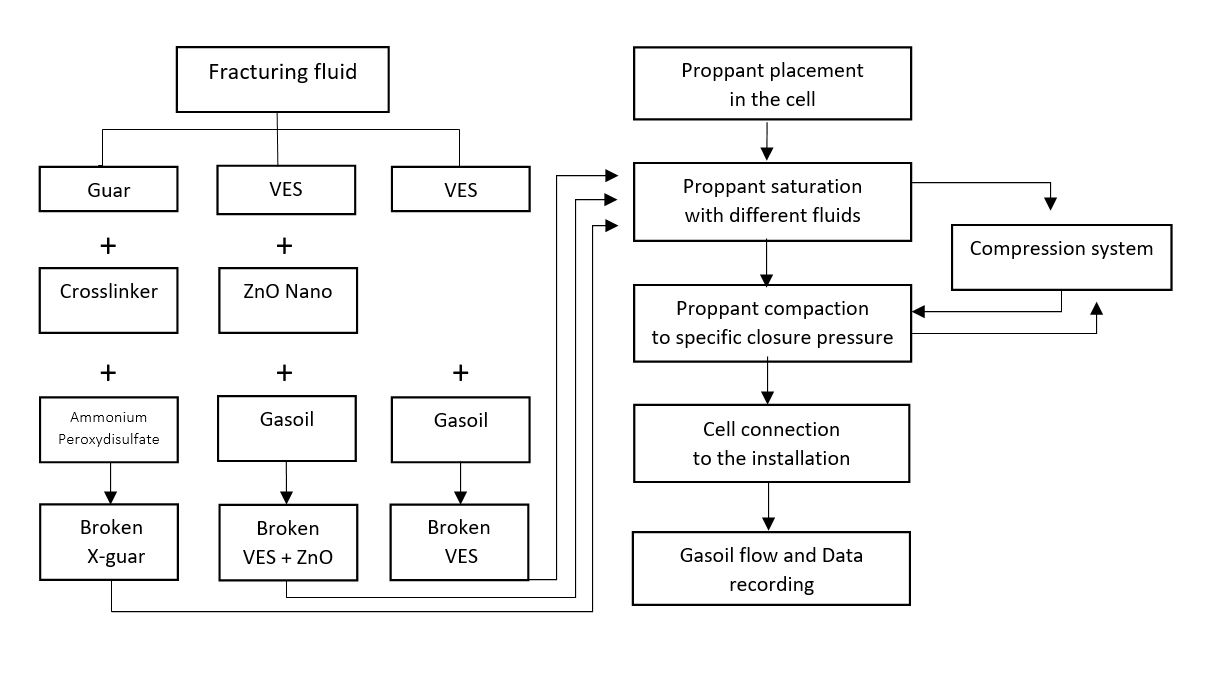

The results of one fluid on a proppant pack sample without the use of any kind of fracturing fluid.

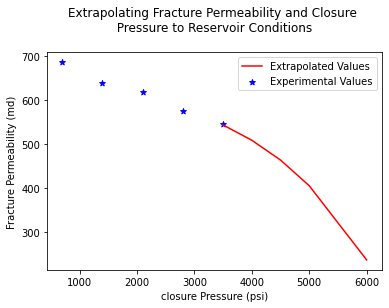

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

x = np.array([700, 1400, 2100, 2800, 3500])
y = np.array([685.965371, 637.622633, 617.802562, 575.0051, 544.416961])

params, params_covariance = curve_fit(func, x, y)

x_pred = np.array([3500, 4000, 4500, 5000, 6000])
y_pred = func(x_pred, params[0], params[1], params[2], params[3])

plt.scatter(x, y, color='blue', marker='*', label='Experimental Values')
plt.plot(x_pred, y_pred, color='red', label='Extrapolated Values')
plt.xlabel('closure Pressure (psi)') 
plt.ylabel('Fracture Permeability (md)')
plt.title('Extrapolating Fracture Permeability and Closure \n Pressure to Reservoir Conditions \n')
plt.legend()
plt.show()


The results of the use of different fracturing fluids on a proppant pack fracture : 

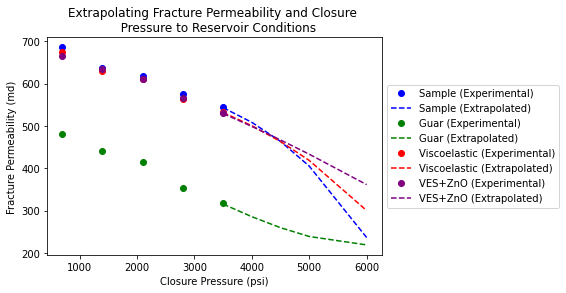

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Sample Data
x_sample = np.array([700, 1400, 2100, 2800, 3500])
y_sample = np.array([685.965371, 637.622633, 617.802562, 575.0051, 544.416961])
params_sample, params_covariance_sample = curve_fit(func, x_sample, y_sample)
x_pred_sample = np.array([3500, 4000, 4500, 5000, 6000])
y_pred_sample = func(x_pred_sample, params_sample[0], params_sample[1], params_sample[2], params_sample[3])

# Guar Data
x_guar = np.array([700, 1400, 2100, 2800, 3500])
y_guar = np.array([482.061416, 440.450883, 415.493246, 353.751604, 316.911021])
params_guar, params_covariance_guar = curve_fit(func, x_guar, y_guar)
x_pred_guar = np.array([3500, 4000, 4500, 5000, 6000])
y_pred_guar = func(x_pred_guar, params_guar[0], params_guar[1], params_guar[2], params_guar[3])

# Viscoelastic Data
x_ves = np.array([700, 1400, 2100, 2800, 3500])
y_ves = np.array([673.676547, 629.069659, 609.855069, 563.197841, 533.187407])
params_ves, params_covariance_ves = curve_fit(func, x_ves, y_ves)
x_pred_ves = np.array([3500, 4000, 4500, 5000, 6000])
y_pred_ves = func(x_pred_ves, params_ves[0], params_ves[1], params_ves[2], params_ves[3])

# VES + ZnO Data
x_ves_zno = np.array([700, 1400, 2100, 2800, 3500])
y_ves_zno = np.array([665.709869, 633.481118, 609.855069, 565.491166, 530.137994])
params_ves_zno, params_covariance_ves_zno = curve_fit(func, x_ves_zno, y_ves_zno)
x_pred_ves_zno = np.array([3500, 4000, 4500, 5000, 6000])
y_pred_ves_zno = func(x_pred_ves_zno, params_ves_zno[0], params_ves_zno[1], params_ves_zno[2], params_ves_zno[3])

# Plotting the Graph
fig, ax = plt.subplots()

plt.plot(x, y_sample, 'o', color='blue', label='Sample (Experimental)')
plt.plot(x_pred_sample, y_pred_sample, color='blue', linestyle='dashed', label='Sample (Extrapolated)')

plt.plot(x, y_guar, 'o', color='green', label='Guar (Experimental)')
plt.plot(x_pred_guar, y_pred_guar, color='green', linestyle='dashed', label='Guar (Extrapolated)')

plt.plot(x, y_ves, 'o', color='red', label='Viscoelastic (Experimental)')
plt.plot(x_pred_ves, y_pred_ves, color='red', linestyle='dashed', label='Viscoelastic (Extrapolated)')

plt.plot(x, y_ves_zno, 'o', color='purple', label='VES+ZnO (Experimental)')
plt.plot(x_pred_ves_zno, y_pred_ves_zno, color='purple', linestyle='dashed', label='VES+ZnO (Extrapolated)')

plt.xlabel('Closure Pressure (psi)') 
plt.ylabel('Fracture Permeability (md)')
plt.title('Extrapolating Fracture Permeability and Closure \n  Pressure to Reservoir Conditions')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()



The graph shows that the VES+nano fluid combination maintained higher permeability at higher closure pressures compared to the other fluids, Sample, Guar and VES. This is attributed to the use of nano material in the fluid combination, which enhances the permeability at high closure pressure conditions.

The VES fluid also gave good results and is second best among the four fluids, with high permeability and closure pressure. This is because the viscoelastic surfactant used in the VES fluid doesn't leave any residue within the proppant pack, leading to better results.

On the other hand, the Guar fluid gave the worst results compared to the others, with low permeability and closure pressure. This is due to the residue of the polymeric fluid in the proppant pack, which leads to a decrease in permeability and closure pressure.



In [ ]:
Souheib Seid